In [264]:
import pandas as pd
import matplotlib.pyplot as plt

racesCreateDateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')
racesCreated = pd.read_csv("races.csv", sep=";",parse_dates=['race_created'],date_parser=racesCreateDateparse, usecols=['id','race_created'])
racesCreated.dropna(how="all")
createdRacesSize = racesCreated['race_created'].size
createdRacesSize

166609

In [265]:
drivenRaces = pd.read_csv("races.csv", sep=";", usecols=['id','race_driven'])
#drivenRaces.dropna(how="all")

#validate dataframe
drivenRacesWithValidTimeStamps = drivenRaces.loc[drivenRaces['race_driven'] != "0000-00-00 00:00:00"]
drivenRacesSize = drivenRacesWithValidTimeStamps['race_driven'].size
drivenRacesSize

109099

In [266]:
createdButNotDrivenRaces = createdRacesSize - drivenRacesSize
createdButNotDrivenRaces

57510

### Absprungrate von ca 30 %

In [267]:
firstCreatedRace = min(racesCreated['race_created'])
firstCreatedRace

Timestamp('2012-03-06 00:00:00')

In [268]:
lastCreatedRace = max(racesCreated['race_created'])
lastCreatedRace

Timestamp('2017-06-27 00:00:00')

In [269]:
#maximal erstellte Rennen
max(racesCreated['race_created'].value_counts().sort_index())

1303

In [270]:
createdButNotDrivenRaces

57510

In [271]:
sumOfSameRacesAtOneDay = racesCreated['race_created'].value_counts()
sumOfSameRacesAtOneDay.head().to_frame()

,race_created
2012-03-08,1303
2012-03-07,1158
2012-12-11,938
2012-12-17,922
2012-03-06,891


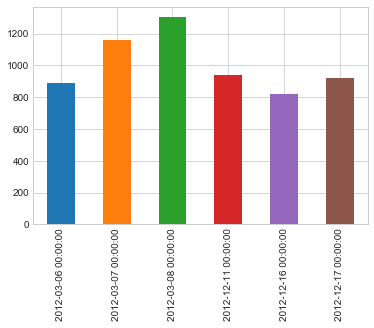

In [272]:
#top 5, wo am meisten Rennen erstellt worden sind
sumOfSameRacesAtOneDay.loc[lambda x : x>800].sort_index().plot.bar()

In [273]:
test = racesCreated['race_created'].value_counts().sort_index().reset_index()
test

,index,race_created
0,2012-03-06,891
1,2012-03-07,1158
2,2012-03-08,1303
3,2012-03-09,799
4,2012-03-10,750
5,2012-03-11,733
6,2012-03-12,762
7,2012-03-13,711
8,2012-03-14,532
9,2012-03-15,650


In [263]:
df2 = pd.DataFrame()
df2['race_created'] = test['index'] #race_created
df2['count'] = df2['race_created'].value_counts()
df2

,race_created,count
0,2012-03-06,NaN
1,2012-03-07,NaN
2,2012-03-08,NaN
3,2012-03-09,NaN
4,2012-03-10,NaN
5,2012-03-11,NaN
6,2012-03-12,NaN
7,2012-03-13,NaN
8,2012-03-14,NaN
9,2012-03-15,NaN


In [274]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [275]:
fig = plt.figure()
ax = plt.axes()
plt.plot(df2['race_created'],df2['count'],linestyle='solid')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x116696840> (for post_execute):


ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

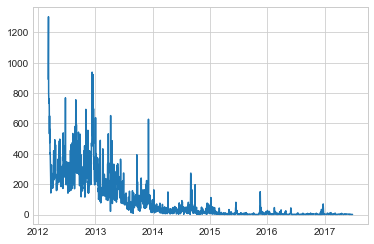

In [277]:
fig = plt.figure()
ax = plt.axes()
plt.plot(test['index'],test['race_created'],linestyle='solid')